# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [75]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [76]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
from sys import platform
if "linux" in platform.lower() or "darwin" in platform.lower():
    # Linux or OS X
    proj_dir = "~/"
    mnist = fetch_mldata('MNIST original', data_home= proj_dir + "datasets/mnist")
elif "windows" in platform.lower() or "win32" in platform.lower():
    # Windows...
    proj_dir = "C:\Users\sombiri\Documents\software\w207\Fall2017-Section2\Projects"
    mnist = fetch_mldata('MNIST original', data_home= proj_dir + "\datasets\mnist")
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

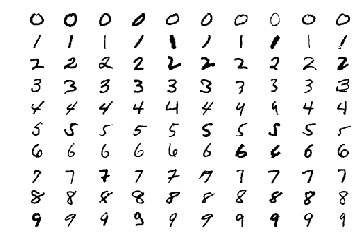

In [77]:
def P1(num_examples=10):

### STUDENT START ###
    '''
    This function finds and displays the requested number of
    examples of each entry within set of image data
        num_examples: The number of examples to display for each entry
    '''
    # Determine the number of unique entries within the  set
    set_size = len(set(train_labels))
    
    # Get n examples of each label where n = num_examples
    digit = []
    for x in range(set_size):
        digit.append(np.where(train_labels == x)[0][:num_examples])

    # Create a plot that is set_size by num_examples large
    f, axarr = plt.subplots(set_size, num_examples)
    for x in range(set_size):
        i = 0
        for example in digit[x]:
            pixels = train_data[example]
            pixels = pixels.reshape((28, 28))
            axarr[x, i].imshow(pixels, cmap='gray_r')
            axarr[x, i].axis('off')
            i = i + 1

    plt.show()

### STUDENT END ###A

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [78]:
# Helper function
def get_accuracy(expected_labels, predicted_labels):
    '''
    Inputs: expected_labels: Array of expected values
            predicted_labels: Array of predicted values
    Output: The overall accuracy of the predicted labels
    '''
    err = 0
    for expected, predicted in list(zip(expected_labels, predicted_labels)):
        if int(predicted) is not int(expected):
            err = err + 1
    accuracy = 1-(float(err)/len(expected_labels))
    return accuracy*100


In [79]:
def P2(k_values):

### STUDENT START ###
    # Simplify data / labels references
    X = mini_train_data
    y = mini_train_labels

    for k in k_values:
        # Create instance of K-Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(k)
        clf.fit(X, y)

        # Predict using dev_data
        Z = clf.predict(dev_data)

        if k is 1:
            # Print a classification report for k=1
            print "\t\t\t  k = %i" % k
            print classification_report(dev_labels, Z)

        # Print the prediction's accuracy
        # Note: This method is faster than calling KNeighborsClassifier.score
        print "k = %i\t Accuracy: %.2f%%" % (k, get_accuracy(dev_labels, Z)) 
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

			  k = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k = 1	 Accuracy: 88.80%
k = 3	 Accuracy: 87.80%
k = 5	 Accuracy: 86.90%
k = 7	 Accuracy: 86.50%
k = 9	 Accuracy: 86.30%


ANSWER: For **k=1**, **9** is the most difficult digit because it has the lowest f1-score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [80]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    k = 1
    time_list = []

    for size in train_sizes:
        # Shuffle data and labels for the training data set. 
        # Since these are two seperate arrays it's necessary to create a
        # randomized index that applies to both 
        randomize = np.random.permutation(len(train_data))
        size_train_data = train_data[randomize][:size]
        size_train_labels = train_labels[randomize][:size]

        # Start timer
        start = time.time()
        
        # Train a k-NN model
        clf = KNeighborsClassifier(k)
        clf.fit(size_train_data, size_train_labels)

        # Calculate the model's prediction accuracy
        Z = clf.predict(dev_data)
        accuracies.append(get_accuracy(dev_labels, Z))
        
        # Stop timer
        end = time.time()
        time_list.append(end - start)

    # Print results
    result_df = pd.DataFrame(zip(train_sizes, accuracies, time_list))
    result_df.rename(columns={
        0: 'Size', 
        1: 'Accuracy (%)', 
        2: 'Computation Time (s)'}, inplace=True)
    print result_df.to_string(index=False)
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Size  Accuracy (%)  Computation Time (s)
  100          69.7                 0.101
  200          78.5                 0.230
  400          82.8                 0.436
  800          86.0                 0.890
 1600          90.3                 1.805
 3200          92.8                 3.664
 6400          94.4                 7.466
12800          95.4                15.432
25000          97.3                32.636


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

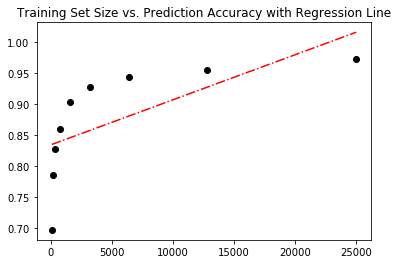

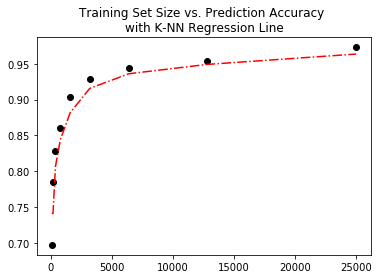

In [81]:
def P4():

### STUDENT START ###
    # First make train_sizes and accuracies vectors
    train_sizes_vec = np.array(train_sizes).reshape(-1,1)
    accuracies_vec = np.array(accuracies, dtype=float).reshape(-1,1)/100

    # Even though it doesn't look linear, let's fit a linear model
    model = LinearRegression()
    model.fit(train_sizes_vec, accuracies_vec)
    predictions = model.predict(train_sizes_vec)
    plt.figure(1)
    plt.plot(
        train_sizes_vec,
        accuracies_vec, "ko",
        train_sizes_vec,
        predictions, "r-.")
    plt.title("Training Set Size vs. Prediction Accuracy with Regression Line")

    # Predict accuracy at n = 60k gives 126.96% which is impossible
    pred_60k_linear = model.predict(60000)

    # Try k-NN regression
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=2)
    model.fit(train_sizes_vec, accuracies_vec)
    predictions = model.predict(train_sizes_vec)
    plt.figure(2)
    plt.plot(
        train_sizes_vec,
        accuracies_vec, "ko",
        train_sizes_vec,
        predictions, "r-.")
    plt.title("Training Set Size vs. Prediction Accuracy \n"
              "with K-NN Regression Line")

    # For n = 60k the accuracy is 97.29% 
    pred_60k_KNN = model.predict(60000)

### STUDENT END ###

P4()

ANSWER: For n = 60000 a simple linear regression model predicts a predicition accuracy of over 100% which is impossible. Linear regression assumes that the relashionship between each variable continues for all values but prediction accuracies are only valid from 0% to 100%. A better estimator is the k-NN regressor which predicts a prediction accuracy of 97.29%.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [82]:
# Helper function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Modified from: http://scikit-learn.org/stable/auto_examples/
    model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


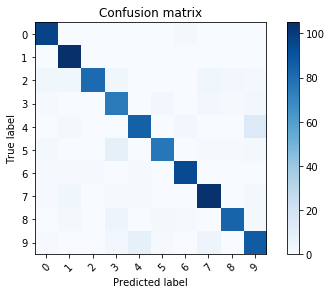

Confused digits


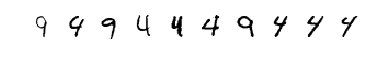

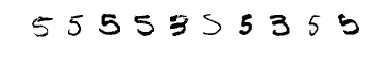

In [83]:
def P5():

### STUDENT START ###
    k = 1
    # Train 1-NN model
    clf = KNeighborsClassifier(k)
    clf.fit(mini_train_data, mini_train_labels)
    
    # Predict and generate confusion matrix
    predictions = clf.predict(dev_data)
    cm = confusion_matrix(dev_labels, predictions)
    
    # Plot a fancy confusion matrix, also convert labels to ints from floats
    plt.figure()
    plot_confusion_matrix(cm, classes=[int(i) for i in set(train_labels)],
                          title='Confusion matrix')
    plt.show()

    # The confusion matrix shows that the most commonly confused digits are
    # 4 and 9 followed by 3 and 5.
    # Find and plot the confused digits
    # Use pandas dataframe to identify confused digit pairs
    conf_df = pd.DataFrame(
        zip(dev_labels, predictions),
        columns=['dev_labels', 'predictions'])
    confused_49 = conf_df[
        ((conf_df["dev_labels"] == 4.0) & (conf_df["predictions"] == 9.0))
        | ((conf_df["dev_labels"] == 9.0) & (conf_df["predictions"] == 4.0))]
    confused_35 = conf_df[
        ((conf_df["dev_labels"] == 3.0) & (conf_df["predictions"] == 5.0))
        | ((conf_df["dev_labels"] == 5.0) & (conf_df["predictions"] == 3.0))]

    # Collect image data for confused digit pairs
    data_49 = dev_data[confused_49.index.values]
    data_35 = dev_data[confused_35.index.values]

    # Make sure to only attempt to plot data that exists
    len_49 = len(data_49) if(len(data_49) < 10) else 10
    len_35 = len(data_35) if(len(data_35) < 10) else 10

    # Plot the confused digits
    # Plot 4's confused with 9's and vice versa
    print "Confused digits"
    f, axarr = plt.subplots(1, len_49)
    for x in range(len_49):
        pixels = data_49[x]
        pixels = pixels.reshape((28, 28))
        axarr[x].imshow(pixels, cmap='gray_r')
        axarr[x].axis('off')

    # Plot 3's confused with 5's and vice versa
    f, axarr = plt.subplots(1, len_35)
    for x in range(len_35):
        pixels = data_35[x]
        pixels = pixels.reshape((28, 28))
        axarr[x].imshow(pixels, cmap='gray_r')
        axarr[x].axis('off')
    plt.show()

### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [84]:
# Helper functions
import scipy.ndimage as ndimage

def blur_img(input_img, b_coef=0.5):
    '''
    Inputs: Array of pixel values
            b_coef: Blur coefficient, valid between 0-1
    Outputs: Array of pixel values with Gaussian blur applied
    '''

    # Input validation
    b_coef = 0.5 if (type(b_coef) != float) else b_coef
    b_coef = 0.5 if (b_coef > 1 or b_coef < 0) else b_coef
    
    # Weight of neighboring pixels
    neighbor_coef = (1.0 - b_coef) / 8

    # Reshape input_img to proper 28 x 28 dimensions
    input_img = input_img.reshape(28, 28)

    # Apply blur to pixels
    def simple_gaussian_blur(pixels):
        '''
        Expects to be called from ndimage.generic_filter
        Input: 1d array of pixel values 
            Pixel layout:
            |0|   1                      |2|
            |3|   4 (px getting blurred) |5|
            |6|   7                      |8|
        Output: transformed value at called pixel location
        '''
        return b_coef * pixels[4] + \
            neighbor_coef * (
                pixels[0] + pixels[1] +
                pixels[2] + pixels[3] +
                pixels[5] + pixels[6] +
                pixels[7] + pixels[8])

    # Filter array, ndimage.generic_filter uses this filter to pass the pixels
    # used for blurring into the simple_gaussian_blur function
    fp_3x3 = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]])

    return ndimage.generic_filter(
        input_img,
        simple_gaussian_blur,
        footprint=fp_3x3,
        mode='constant',
        cval=0).flatten()


def blur_dataset(data, b_coef=0.5):
    """
    Input: An array of digits
    Output: Array with blurred digits
    """
    output_data = np.zeros(data.shape)
    for i, digit in enumerate(output_data):
        output_data[i] = blur_img(data[i], b_coef)
    return output_data

# Preprocessing
blur1 = 0.25
blur2 = 0.75
train_data_blurred1 = blur_dataset(train_data, blur1)
dev_data_blurred1 = blur_dataset(dev_data, blur1)
train_data_blurred2 = blur_dataset(train_data, blur2)
dev_data_blurred2 = blur_dataset(dev_data, blur2)
print "Pre-processing complete"

Pre-processing complete


In [85]:
def P6():
    
### STUDENT START ###

    k = 1
    columns = (
        'Model',
        'Accuracy (blur=' + str(blur1) + ')',
        'Accuracy (blur=' + str(blur2) + ')')

    # Blurred training data regular dev data
    clf_1_b1 = KNeighborsClassifier(k).fit(train_data_blurred1, train_labels)
    clf_1_b2 = KNeighborsClassifier(k).fit(train_data_blurred2, train_labels)
    result_df = pd.DataFrame([[
        "Blurred training data regular dev data",
        get_accuracy(dev_labels, clf_1_b1.predict(dev_data)),
        get_accuracy(dev_labels, clf_1_b2.predict(dev_data))]],
        columns=columns)

    # Regular training data blurred dev data
    clf_2 = KNeighborsClassifier(k).fit(train_data, train_labels)
    result_df = result_df.append(pd.DataFrame([[
        "Regular training data with blurred dev data",
        get_accuracy(dev_labels, clf_2.predict(dev_data_blurred1)),
        get_accuracy(dev_labels, clf_2.predict(dev_data_blurred2))]],
        columns=columns))

    # Blurred training and dev data
    clf_3_b1 = KNeighborsClassifier(k).fit(train_data_blurred1, train_labels)
    clf_3_b2 = KNeighborsClassifier(k).fit(train_data_blurred2, train_labels)
    result_df = result_df.append(pd.DataFrame([[
        "Blurred training data with regular dev data",
        get_accuracy(dev_labels, clf_3_b1.predict(dev_data_blurred1)),
        get_accuracy(dev_labels, clf_3_b2.predict(dev_data_blurred2))]],
        columns=columns))

    # Print results
    from IPython.display import display
    print display(result_df)

### STUDENT END ###

P6()

,Model,Accuracy (blur=0.25),Accuracy (blur=0.75)
0,Blurred training data regular dev data,98.2,97.9
0,Regular training data with blurred dev data,96.4,97.7
0,Blurred training data with regular dev data,98.0,97.9


None


ANSWER: Blurring the training data only (model 1) improves model accuracy while bluring the development data and using regular training data has consistently poor performance. Applying blur to both datasets gives performance somewhere in between.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [86]:
def P7():

### STUDENT START ###
    # Fit model using BernoulliNB and binarize data
    bern_clf = BernoulliNB(binarize=0.5)
    bern_clf.fit(train_data, train_labels)
    print "BernoulliNB accuracy: {}%".format(
        get_accuracy(dev_labels, bern_clf.predict(dev_data)))

    # Fit model using MultinomialNB with tri-narized data
    binned_data = np.zeros(train_data.shape)
    # Convert pixel values to 3 classes 0, 1, and 2
    lower, upper = (0.3333, 0.6666)
    for i, pixels in enumerate(train_data):
        binned_data[i][pixels < lower] = 0
        binned_data[i][np.all([pixels >= lower, pixels < upper], axis=0)] = 1
        binned_data[i][pixels >= upper] = 2

    # Fit model
    multNB_clf = MultinomialNB()
    multNB_clf.fit(train_data, train_labels)
    print "MultinomialNB accuracy: {}%".format(
        get_accuracy(dev_labels, multNB_clf.predict(dev_data)))

    ### STUDENT END ###

P7()

BernoulliNB accuracy: 84.5%
MultinomialNB accuracy: 82.6%


ANSWER: The Bernoulli naive Bayes classifier gives a higher prediction accuracy than Multinomial naive Bayes which means that the multi-class version does not improve our results. This is possibly because the multinomial model is overfitted to the training data. The gray values might not provide any or enough extra information to determine a digit's label.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [87]:
def P8(alphas):

    ### STUDENT START ###
    Grid = GridSearchCV(BernoulliNB(binarize=0.5), alphas)
    Grid.fit(mini_train_data, mini_train_labels)
    return Grid

    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


C:\Program Files\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Program Files\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [88]:
print "ANSWER: The best alpha value is {} with an accuracy of {}%."\
"\nFor alpha = {} the accuracy was {}%, which is far worse than expected"\
"".format(nb.best_params_['alpha'], nb.best_score_*100, int(nb.grid_scores_[0][0]['alpha']), nb.grid_scores_[0][1]*100)

ANSWER: The best alpha value is 0.01 with an accuracy of 82.1%.
For alpha = 0 the accuracy was 9.2%, which is far worse than expected


(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

GaussianNB accuracy: 57.1%
Modified GaussianNB accuracy: 79.3%


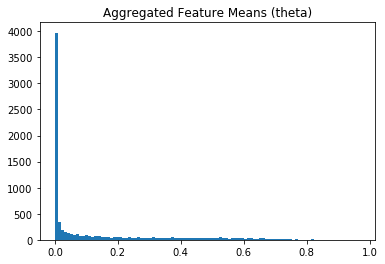

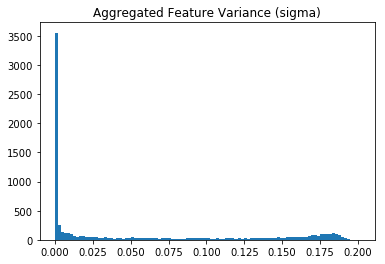

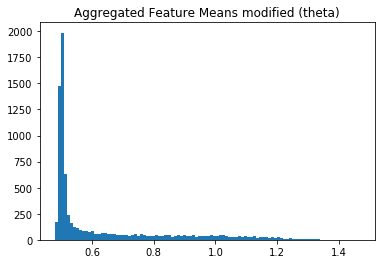

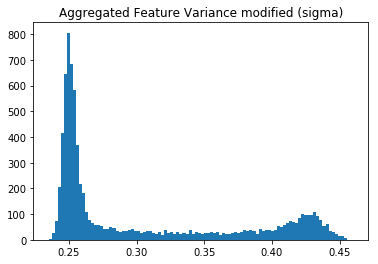

In [89]:
def P9():

### STUDENT END ###
    # Fit model using BernoulliNB and binarize data
    gaussian_clf = GaussianNB()
    gaussian_clf.fit(train_data, train_labels)
    print "GaussianNB accuracy: {}%".format(
        get_accuracy(dev_labels, gaussian_clf.predict(dev_data)))

    plt.figure(1)
    plt.hist(gaussian_clf.theta_.flatten(), 100)
    plt.title("Aggregated Feature Means (theta)")
    plt.figure(2)
    plt.hist(gaussian_clf.sigma_.flatten(), 100)
    plt.title("Aggregated Feature Variance (sigma)")
    
    # Our data is super skewed and doesn't really fit a Gaussian model
    # Attempt to fit data to a normal (Gaussian) distribution
    train_data_modified = (train_data +
                           np.random.normal(
                               loc=0.5,
                               scale=0.5, 
                               size=train_data.shape))
    dev_data_modified = (dev_data +
                         np.random.normal(
                             loc=0.5,
                             scale=0.5,
                             size=dev_data.shape))
    fixed_gaussian_clf = GaussianNB()
    fixed_gaussian_clf.fit(train_data_modified, train_labels)
    print "Modified GaussianNB accuracy: {}%".format(
        get_accuracy(
            dev_labels,
            fixed_gaussian_clf.predict(dev_data_modified)))

    # Plot modified data
    plt.figure(3)
    plt.hist(fixed_gaussian_clf.theta_.flatten(), 100)
    plt.title("Aggregated Feature Means modified (theta)")
    plt.figure(4)
    plt.hist(fixed_gaussian_clf.sigma_.flatten(), 100)
    plt.title("Aggregated Feature Variance modified (sigma)")

### STUDENT END ###

gnb = P9()

ANSWER: The problem is that our data does not fit a Gaussian normal distribution. Most of the values are 0's from the null space in our digit images, which skews the data significantly in one direction. The solution is fit the data to a gausian distribution by adding Gaussian distribution shaped noise to it. This increases the accuracy of the model from 57.1% to 83.4%.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

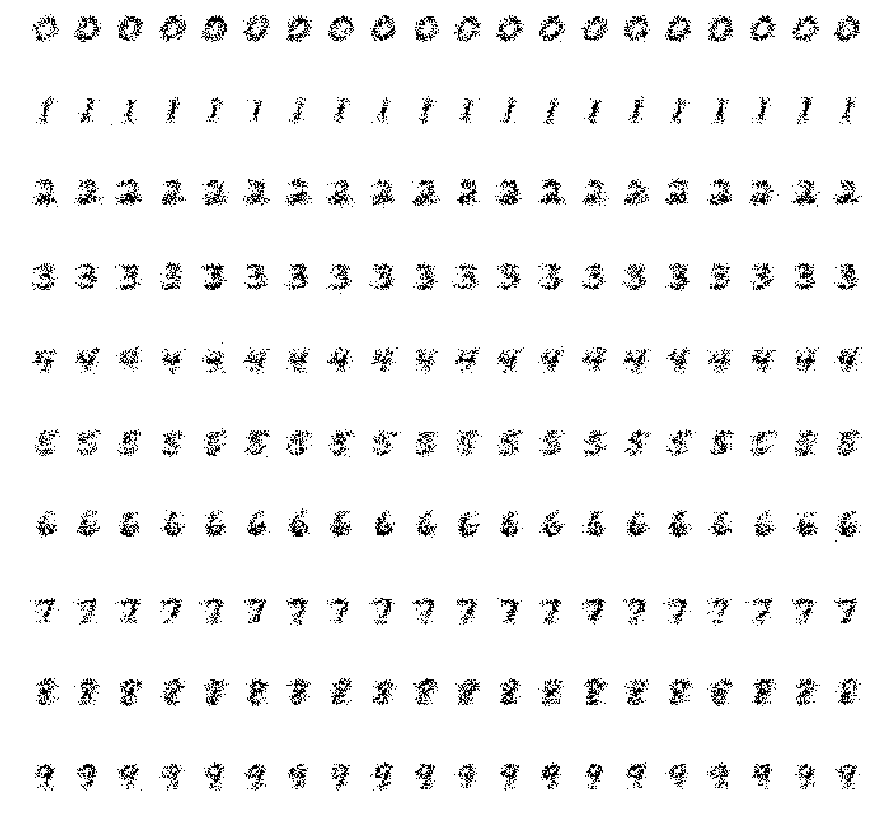

In [90]:
def P10(num_examples):
    ### STUDENT START ###

    # Train BernoulliNB model
    bernoulli_clf = BernoulliNB(alpha=0.01, binarize=0.5)
    bernoulli_clf.fit(mini_train_data, mini_train_labels)

    # Get pixel probabilities for each digit eg. P(pixel | digit)
    est_probs = np.exp(bernoulli_clf.feature_log_prob_)

    # Determine the number of unique entries within the  set
    set_size = len(set(train_labels))

    # Create a plot that is set_size by num_examples large
    f, axarr = plt.subplots(set_size, num_examples, figsize=(15,15))
    for digit in range(set_size):
        for example in range(num_examples):
            pixels = (est_probs[digit] > np.random.rand(
                est_probs.shape[1])).reshape((28, 28))
            axarr[digit, example].imshow(pixels, cmap='gray_r')
            axarr[digit, example].axis('off')

    plt.show()
    ### STUDENT END ###

P10(20)


ANSWER: The generated digits have a higher contrast with the training data, not just because there are no pixel values between 0 and 1, the generated pixels also seem more abstract than the digits they represent. It's easy to see how the confused digits plotted in part 5, 4 & 9, and 3 & 5, seem much closer together for our classifier.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.200
p(pred) <= 0.9990000000000    total =  86    accuracy = 0.465
p(pred) <= 0.9999900000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999990000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999999900    total =  73    accuracy = 0.877
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.840
p(pred) <= 1.0000000000000    total = 532    accuracy = 0.953


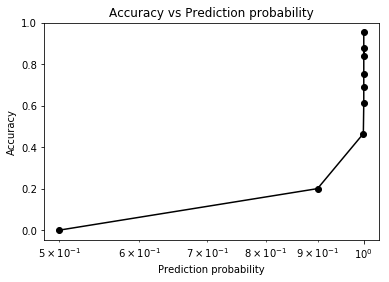

In [91]:
def P11(buckets, correct, total):

## STUDENT START ###
    # Train BernoulliNB model with train_data using the best aplha value
    # determined in part 8
    bernoulli_clf = BernoulliNB(alpha=0.01, binarize=0.5)
    bernoulli_clf.fit(mini_train_data, mini_train_labels)

    # Use dev_data to generate prediction probabilities
    pred_labels = bernoulli_clf.predict(dev_data)
    pred_probs = bernoulli_clf.predict_proba(dev_data)

    # Find the max predicted probability for each label
    for l_index, pred_label in enumerate(pred_labels):
        # Place the predicted probability into the correct bucket
        b_index = sum(max(pred_probs[l_index]) > buckets)
        # Increment the correct count if the prediction is right
        correct[b_index] += 1 if pred_label == dev_labels[l_index] else 0
        # Count each entry
        total[b_index] += 1
    plt.figure(1)
    plt.plot(
        buckets,
        [(1.0* correct[i] / total[i] if (total[i] > 0) else 0)
             for i in range(len(total))],
        "ko-")
    plt.xscale('log')
    plt.title('Accuracy vs Prediction probability')
    plt.xlabel('Prediction probability')
    plt.ylabel('Accuracy')
    
    return (correct, total)
## STUDENT END ###

buckets = [0.5,
           0.9,
           0.999,
           0.99999,
           0.9999999,
           0.999999999,
           0.99999999999,
           0.9999999999999,
           1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = 1.0 * correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d'\
    '    accuracy = %.3f' % (buckets[i], total[i], accuracy)


ANSWER: The BernoulliNB classifier is well calibrated because accuracy is correlated with predicted probability.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

		Accuracies
Original Bernoulli classifier: 81.9%
Bernoulli classifier with HoG data: 85.1%


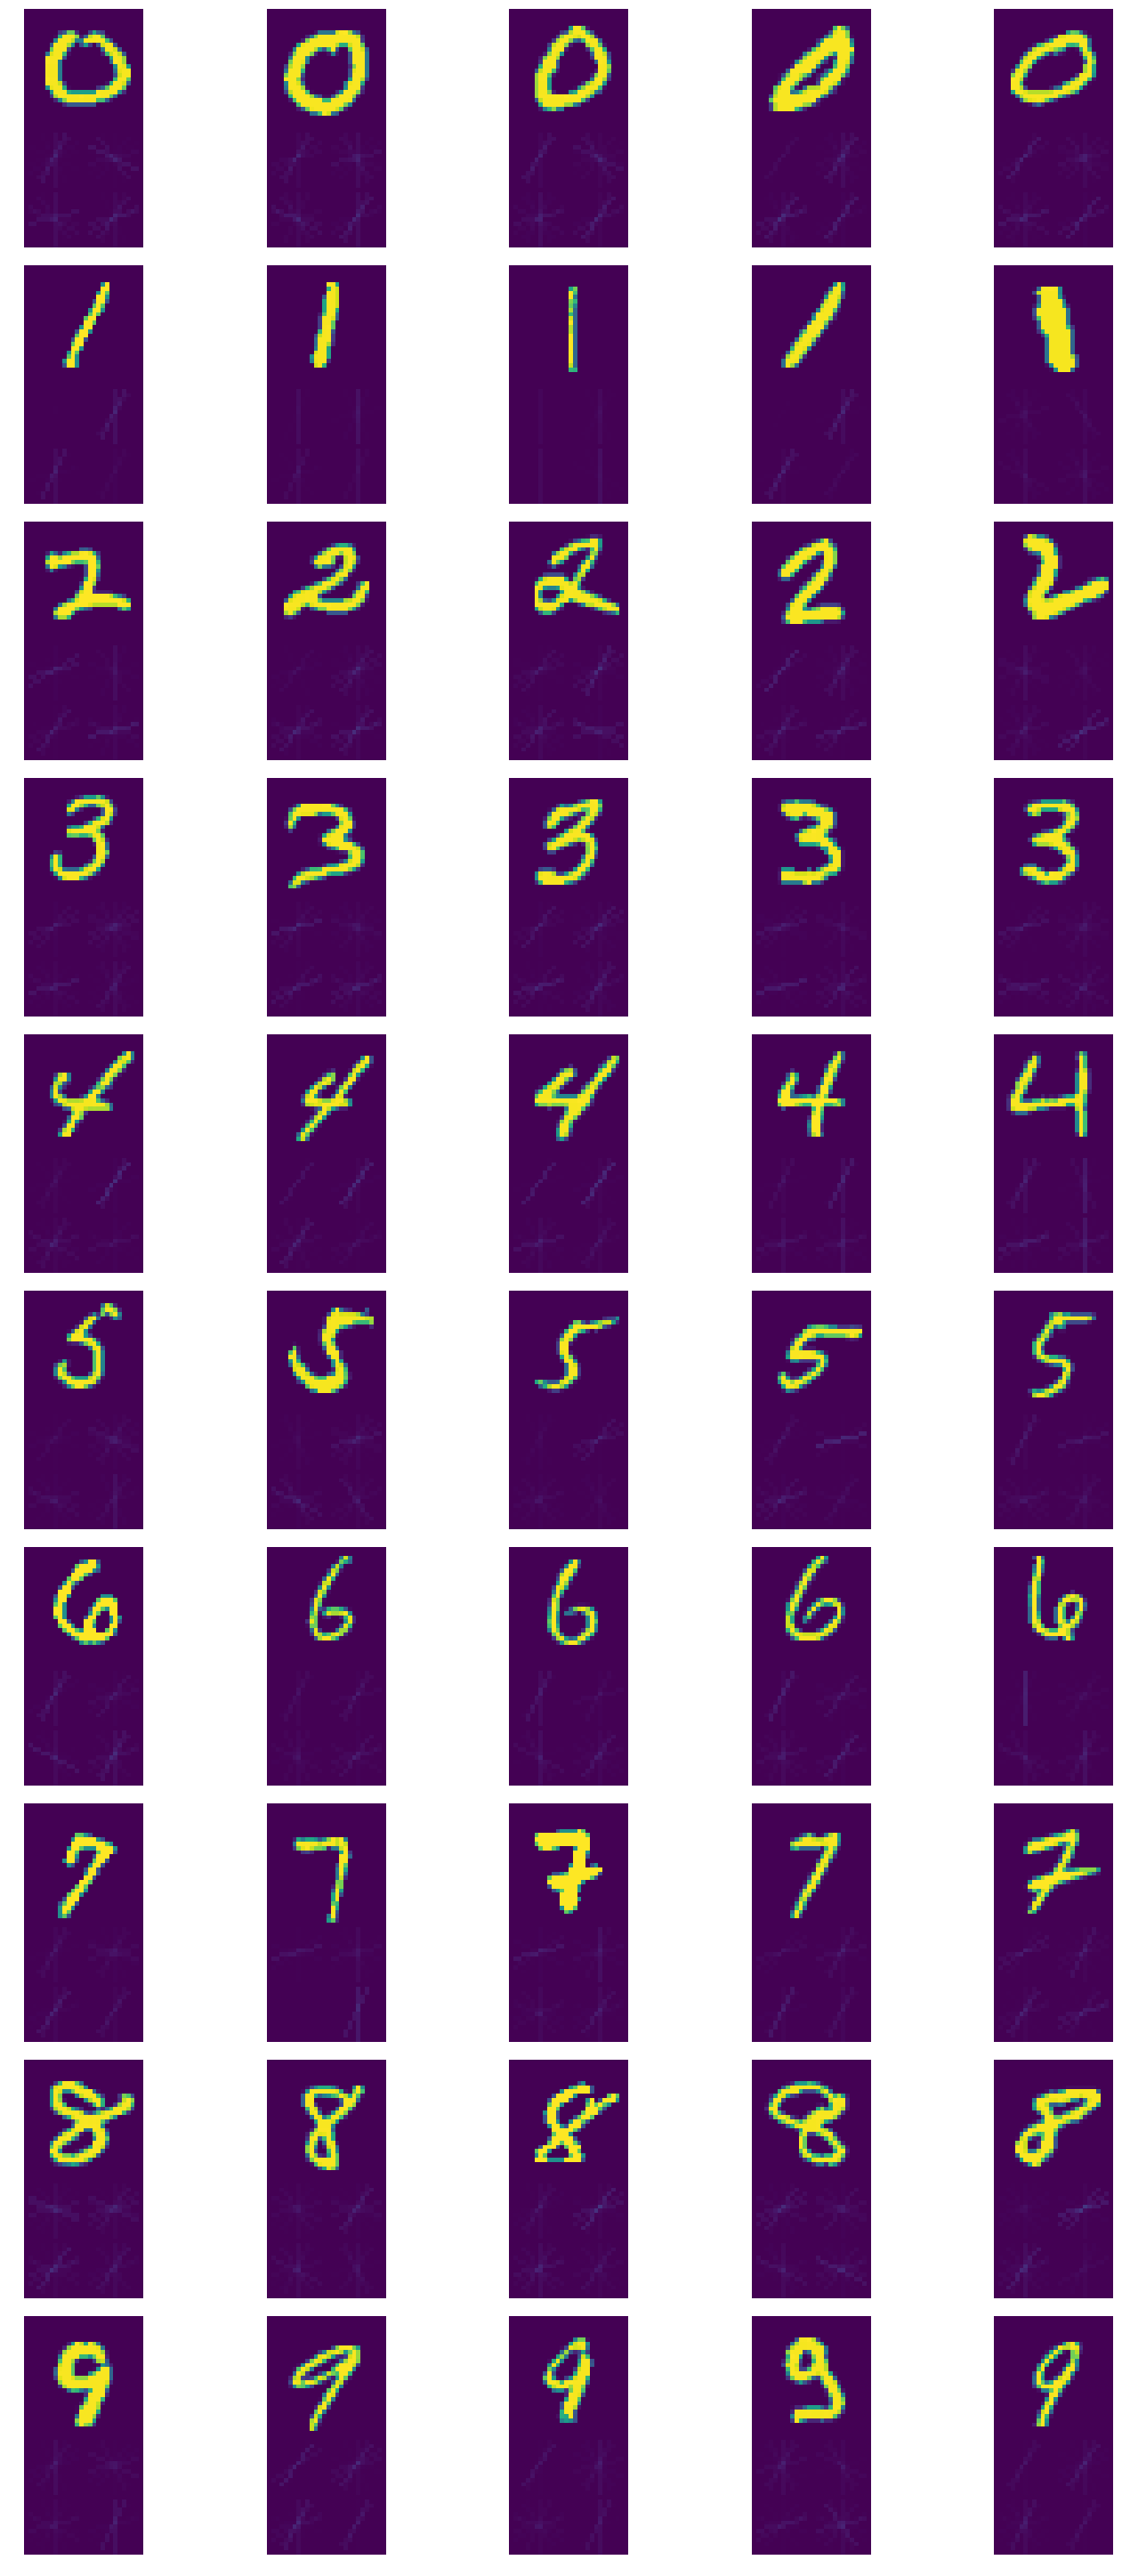

In [92]:
from skimage.feature import hog
def add_hog_feat(data):
    """
    Input: data with pixel values
    Output: data with pixel values and histogram of gradients data
    Reference: http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog
    """
    # Initialize empty array for new features
    hog_imgs = np.zeros(data.shape)

    # Add Histogram of gradients data to images
    # Note: The size of pixels per cell was determined by finding where
    # prediction accuracy begins to decline. At 14x14 the image is split into
    # 4 parts, splitting into fewer parts reduces the amount of information
    # gained from this technique while splitting into more parts causes the 
    # technique to lose efficacy as most of the image is pixels with 0 value.
    for index, digit in enumerate(data):
        image = digit.reshape((28, 28))
        hog_feat, img = hog(image,
                            pixels_per_cell=(14, 14),
                            cells_per_block=(1, 1),
                            visualise=True)
        hog_imgs[index] = img.flatten()

    # Return the data with new features
    # The histogram of gradients image data is appended to the existing image
    return np.hstack((data, hog_imgs))

def P12():

### STUDENT START ###
    # Add histogram of gradients to data
    mod_train_data = add_hog_feat(mini_train_data)
    mod_dev_data = add_hog_feat(dev_data)

    # Train BernoulliNB models with both original and additional features
    # Note: The modified model does not use binarized data because Histogram
    # of gradients relies on pixel variations
    alpha = 0.1
    bernoulli_clf = BernoulliNB(alpha=alpha, binarize=0.50)
    mod_bernoulli_clf = BernoulliNB(alpha=alpha)
    # Calculate accuracy of original model
    bernoulli_clf.fit(mini_train_data, mini_train_labels)
    orig_accuracy = get_accuracy(dev_labels, bernoulli_clf.predict(dev_data))
    # Calculate accuracy with modified data
    mod_bernoulli_clf.fit(mod_train_data, mini_train_labels)
    mod_accuracy = get_accuracy(dev_labels,
                                mod_bernoulli_clf.predict(mod_dev_data))
    print "\t\tAccuracies\r\nOriginal Bernoulli classifier: {}%"\
    "\r\nBernoulli classifier with HoG data: "\
    "{}%".format(orig_accuracy, mod_accuracy)
    
    # Plot examples of added histogram of gradients data
    # Note: using default color mapping so HoG data is easier to see
    num_examples = 5
    set_size = len(set(mini_train_labels))
    # Get n examples of each label where n = num_examples
    digit = []
    for x in range(set_size):
        digit.append(np.where(mini_train_labels == x)[0][:num_examples])

    f, axarr = plt.subplots(set_size, num_examples, figsize=(20,40))
    for x in range(set_size):
        i = 0
        for example in digit[x]:
            pixels = mod_train_data[example]
            pixels = pixels.reshape((56, 28))
            axarr[x, i].imshow(pixels)
            axarr[x, i].axis('off')
            i = i + 1
    plt.tight_layout(pad=0)
    plt.show()
### STUDENT END ###

P12()



The addition of histogram of gradients (HoG) data improved the prediction accuracy by 3.2%, adjusting the parameters of the HoG function or adding additional features could also improve results further.